In [1]:
import pickle

In [2]:
import numpy as np

In [3]:
with open('F:\\NLP intro\\course stuff\\UPDATED_NLP_COURSE\\06-Deep-Learning\\train_qa.txt','rb') as f:
    train_data = pickle.load(f)

In [4]:
with open('F:\\NLP intro\\course stuff\\UPDATED_NLP_COURSE\\06-Deep-Learning\\test_qa.txt','rb') as f:
    test_data = pickle.load(f)

In [5]:
type(test_data)

list

In [6]:
type(train_data)

list

In [7]:
len(train_data)

10000

In [8]:
len(test_data)

1000

In [9]:
' '.join(train_data[0][0]) #previewing the story

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [10]:
' '.join(train_data[0][1]) #previewing the question

'Is Sandra in the hallway ?'

In [11]:
(train_data[0][2]) #previewing the answer

'no'

In [12]:
#creating a vocabulary for all train and test data

all_data = test_data + train_data

In [13]:
set(train_data[0][0])

{'.',
 'Mary',
 'Sandra',
 'bathroom',
 'bedroom',
 'journeyed',
 'moved',
 'the',
 'to'}

In [14]:
vocab = set()

for story,question,answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [15]:
vocab.add('no')

In [16]:
vocab.add('yes')

In [17]:
vocab #all the unique words in vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [18]:
vocab_len = len(vocab) + 1

In [19]:
vocab_len # 37 unique words. +1 for the keras placeholder

38

In [20]:
# Longest story

all_story_lens = [len(data[0]) for data in all_data]

In [21]:
max_story_len = max(all_story_lens)

In [22]:
all_ques_lens = [len(data[1]) for data in all_data]

In [23]:
max_ques_len = max(all_ques_lens)

In [24]:
max_ques_len

6

In [25]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer


In [26]:
# creating an int encoding for the sequences of words
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [27]:
tokenizer.word_index

{'journeyed': 1,
 'moved': 2,
 'sandra': 3,
 '.': 4,
 'office': 5,
 'bathroom': 6,
 'discarded': 7,
 'kitchen': 8,
 'left': 9,
 'got': 10,
 'picked': 11,
 'down': 12,
 'the': 13,
 'up': 14,
 'travelled': 15,
 'no': 16,
 'john': 17,
 'hallway': 18,
 'back': 19,
 'took': 20,
 '?': 21,
 'in': 22,
 'mary': 23,
 'daniel': 24,
 'is': 25,
 'put': 26,
 'there': 27,
 'football': 28,
 'bedroom': 29,
 'to': 30,
 'apple': 31,
 'milk': 32,
 'dropped': 33,
 'garden': 34,
 'yes': 35,
 'went': 36,
 'grabbed': 37}

In [28]:
#tokenization for story, ques and answers

train_story_text = []
train_question_text = []
train_answers = []

In [29]:
for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)
    train_answers.append(answer)

In [30]:
# train_story_text

In [31]:
# turning the texts to numbers with texts_to_sequences

train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [32]:
#vectorizing stories, questions and answers

In [33]:
def vectorize_stories(data,word_index=tokenizer.word_index,max_story_len=max_story_len,max_question_len=max_ques_len):
    
    #Stories = X
    X = []
    
    #questions = Xq
    Xq = []
    
    #Y correct answer (yes/no)
    Y = []
    
    for story,query,answer in data:
        
        #for each story
        #[5, 12,....]
        
        x = [word_index[word.lower()] for word in story]
        
        xq = [word_index[word.lower()] for word in query]
        
        y = np.zeros(len(word_index)+1)
        
        y[word_index[answer]] = 1
        
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    return (pad_sequences(X,maxlen=max_story_len),pad_sequences(Xq,maxlen=max_ques_len),np.array(Y))

In [34]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data)

In [35]:
inputs_test, queries_test, answers_test = vectorize_stories(test_data)

In [36]:
inputs_test

array([[ 0,  0,  0, ..., 13, 29,  4],
       [ 0,  0,  0, ..., 13, 34,  4],
       [ 0,  0,  0, ..., 13, 34,  4],
       ...,
       [ 0,  0,  0, ..., 13, 31,  4],
       [ 0,  0,  0, ..., 13, 34,  4],
       [ 0,  0,  0, ..., 31, 27,  4]])

In [37]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [38]:
tokenizer.word_index['yes']

35

In [39]:
tokenizer.word_index['no']

16

In [40]:
sum(answers_test) # 497 'yes' on index 1 and 503 'no' on index 20

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0., 503.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0., 497.,   0.,   0.])

In [41]:
from keras.models import Sequential,Model

In [42]:
from keras.layers import Embedding

In [43]:
from keras.layers import Input,Activation,Dense,Permute,Dropout,add,dot,concatenate,LSTM

In [44]:
# placeholder shape = (max_story_len,batch_size)
input_sequence = Input((max_story_len,))
question = Input((max_ques_len,))

In [45]:
#vocab_len
vocab_size = len(vocab) + 1

In [46]:
# input encoder m
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(0.3))

# (samples,story_maxlen,embedding_dim)

In [47]:
# input encoder c
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_ques_len))
input_encoder_c.add(Dropout(0.3))

# (samples,story_maxlen,max_ques_len)

In [48]:
# question encoder 
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,output_dim=64,input_length=max_ques_len))
question_encoder.add(Dropout(0.3))

# (samples,question_maxlen,embedding_dim)

In [49]:
# encoded <---- encoder(input)

input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [50]:
# using dot product to compute the match btn the 1st input vec seq and the ques


In [51]:
match = dot([input_encoded_m,question_encoded],axes=(2,2))
match = Activation('softmax')(match)

In [52]:
response = add([match, input_encoded_c])
response = Permute((2,1))(response)

In [53]:
answer = concatenate([response,question_encoded])

In [54]:
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate')>

In [55]:
answer = LSTM(32)(answer)

In [56]:
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer) # (samples, vocab_size) yes/no

In [57]:
answer = Activation('softmax')(answer)

In [58]:
model = Model([input_sequence,question],answer)

In [59]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [60]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 156)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 sequential (Sequential)     (None, None, 64)             2432      ['input_1[0][0]']             
                                                                                                  
 sequential_2 (Sequential)   (None, 6, 64)                2432      ['input_2[0][0]']             
                                                                                              

In [61]:
history = model.fit([inputs_train,queries_train],answers_train,batch_size=32,epochs=100,validation_data=([inputs_test,queries_test],answers_test))

Epoch 1/100


313/313 [==============================] - 5s 9ms/step - loss: 0.8706 - accuracy: 0.4962 - val_loss: 0.6965 - val_accuracy: 0.4970
Epoch 2/100
313/313 [==============================] - 2s 7ms/step - loss: 0.7023 - accuracy: 0.4896 - val_loss: 0.6934 - val_accuracy: 0.4990
Epoch 3/100
313/313 [==============================] - 2s 7ms/step - loss: 0.6977 - accuracy: 0.5011 - val_loss: 0.6935 - val_accuracy: 0.4970
Epoch 4/100
313/313 [==============================] - 2s 7ms/step - loss: 0.6961 - accuracy: 0.5008 - val_loss: 0.6932 - val_accuracy: 0.5030
Epoch 5/100
313/313 [==============================] - 2s 7ms/step - loss: 0.6964 - accuracy: 0.4989 - val_loss: 0.6932 - val_accuracy: 0.4970
Epoch 6/100
313/313 [==============================] - 2s 7ms/step - loss: 0.6953 - accuracy: 0.5018 - val_loss: 0.6933 - val_accuracy: 0.4970
Epoch 7/100
313/313 [==============================] - 2s 7ms/step - loss: 0.6957 - accuracy: 0.4951 - val_loss: 0.6932 - val_accuracy: 0.50

Epoch 55/100
313/313 [==============================] - 2s 7ms/step - loss: 0.6945 - accuracy: 0.4956 - val_loss: 0.6943 - val_accuracy: 0.5030
Epoch 56/100
313/313 [==============================] - 2s 7ms/step - loss: 0.6946 - accuracy: 0.4983 - val_loss: 0.6933 - val_accuracy: 0.4910
Epoch 57/100
313/313 [==============================] - 2s 7ms/step - loss: 0.6949 - accuracy: 0.4978 - val_loss: 0.6934 - val_accuracy: 0.4860
Epoch 58/100
313/313 [==============================] - 2s 7ms/step - loss: 0.6943 - accuracy: 0.5070 - val_loss: 0.6945 - val_accuracy: 0.4830
Epoch 59/100
313/313 [==============================] - 2s 7ms/step - loss: 0.6935 - accuracy: 0.5168 - val_loss: 0.6936 - val_accuracy: 0.4970
Epoch 60/100
313/313 [==============================] - 2s 7ms/step - loss: 0.6943 - accuracy: 0.5049 - val_loss: 0.6960 - val_accuracy: 0.5000
Epoch 61/100
313/313 [==============================] - 2s 7ms/step - loss: 0.6932 - accuracy: 0.5134 - val_loss: 0.6938 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


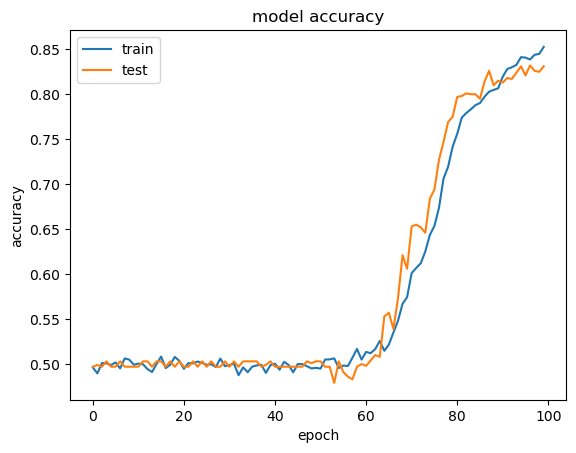

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [63]:
model.save('chatbot100epochsNew.h5')

C:\Users\Nobin\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [64]:
pred_results = model.predict(([inputs_test,queries_test]))

32/32 [==============================] - 1s 2ms/step


In [66]:
# test_data[0][0]

In [67]:
pred_results

array([[2.55808850e-08, 2.99576719e-08, 3.22202922e-08, ...,
        2.79498380e-02, 3.00045606e-08, 2.63284523e-08],
       [9.58793720e-08, 1.04225265e-07, 1.20458239e-07, ...,
        8.47876444e-02, 1.07335374e-07, 1.10126244e-07],
       [1.16994670e-07, 1.34736496e-07, 1.33445056e-07, ...,
        8.72869015e-01, 1.59299063e-07, 1.23110368e-07],
       ...,
       [9.23469301e-08, 1.62390791e-07, 1.49860426e-07, ...,
        1.13901813e-02, 1.27132495e-07, 1.42905378e-07],
       [1.75339892e-07, 1.81044697e-07, 1.66893926e-07, ...,
        9.70077455e-01, 2.17561535e-07, 1.81729206e-07],
       [1.24624057e-06, 1.25210761e-06, 1.29722537e-06, ...,
        9.88173962e-01, 1.29229863e-06, 1.20354082e-06]], dtype=float32)

In [68]:
pred_results.shape

(1000, 38)

In [69]:
val_max = np.argmax(pred_results[0])

In [70]:
for key,val in tokenizer.word_index.items():
    if val == val_max:
        k = key
        

In [71]:
k

'no'

In [72]:
pred_results[0][val_max]

0.97204924

In [73]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [78]:
# making my story in the same format as my trained questions and stories

In [144]:
my_story = "Daniel grabbed the apple in the garden . Mary dropped the apple . "

In [145]:
my_story.split()

['Daniel',
 'grabbed',
 'the',
 'apple',
 'in',
 'the',
 'garden',
 '.',
 'Mary',
 'dropped',
 'the',
 'apple',
 '.']

In [146]:
my_question = "Is daniel in the kitchen ? "

In [147]:
my_question.split()

['Is', 'daniel', 'in', 'the', 'kitchen', '?']

In [148]:
mydata = [(my_story.split(),my_question.split(),'no')]

In [149]:
mydata

[(['Daniel',
   'grabbed',
   'the',
   'apple',
   'in',
   'the',
   'garden',
   '.',
   'Mary',
   'dropped',
   'the',
   'apple',
   '.'],
  ['Is', 'daniel', 'in', 'the', 'kitchen', '?'],
  'no')]

In [150]:
my_story,my_ques,my_ans = vectorize_stories(mydata)

In [151]:
# my_ans

In [152]:
pred_results = model.predict(([my_story,my_ques]))

1/1 [==============================] - 0s 22ms/step


In [153]:
val_max = np.argmax(pred_results[0])

In [154]:
for key,val in tokenizer.word_index.items():
    if val == val_max:
        k = key
        

In [155]:
k

'no'

In [156]:
pred_results[0][val_max]

0.99068344

In [161]:
# for quick story and question

my_story = "Daniel grabbed the apple in the garden . Mary dropped the apple . "
my_question = "Is daniel in the kitchen ? "
mydata = [(my_story.split(),my_question.split(),'no')]

my_story,my_ques,my_ans = vectorize_stories(mydata)
pred_results = model.predict(([my_story,my_ques]))

val_max = np.argmax(pred_results[0])
for key,val in tokenizer.word_index.items():
    if val == val_max:
        k = key
        
        
print("Answer: ",k)
print("Predicted probability: ",pred_results[0][val_max])

1/1 [==============================] - 0s 22ms/step
Answer:  no
Predicted probability:  0.99068344
